# TUTORIAL

In this tutorial, we will present the basic cases and intented usage of the package.

First, we show how to work with the main function: *sagittarius_properties*. Then, we present an overview of the auxiliar functions, in case you are interested on only one type of interpolator.

Before starting, make sure you have installed the package (see README)

## sagittarius_properties

1. Import the package

In [7]:
from sagittarius import interpolators

2. Chose the property/ies you want to query: in this case, we will start by the proper motions

The output is an array whose columns are, in this order:

        1. Distance
        2. Scale (depth of the stream along the line of sight)
        3. pm_long_coslat
        4. pm_lat
        
 If you select only a subset, then the output will NOT have that column.

In [2]:
pm = True
dist=False
scale=False

3. Select the reference frame:

        1. 'ICRS' or 'C': Celestial ICRS spherical reference frame (ra,dec,pmra*,pmdec)
        2. 'Galactic' or 'G': Galactic spherical reference frame (l,b,mul*,mub)

In [3]:
ref_frame='G'

4. Select the source:

A) A20 - [Antoja et al. 2020](https://ui.adsabs.harvard.edu/link_gateway/2020A&A...635L...3A/doi:10.1051/0004-6361/201937145 "A20") (available only Galactic frame for now)

B) Strip: [Ramos et al. 2020](https://ui.adsabs.harvard.edu/link_gateway/2020A&A...638A.104R/doi:10.1051/0004-6361/202037819 "R20") (available only ICRS frame for now)

C) nGC3: [Ramos et al. 2020](https://ui.adsabs.harvard.edu/link_gateway/2020A&A...638A.104R/doi:10.1051/0004-6361/202037819 "R20") (available only ICRS frame for now)

In [4]:
source='A20'

5. Define the points along the stream at which you want to query the properties

This vector, Lambda, has to be in degrees and corresponds to the Sagittarius spherical frame defined in [Belokurov et al. 2014](https://ui.adsabs.harvard.edu/link_gateway/2014MNRAS.437..116B/doi:10.1093/mnras/stt1862)

In [10]:
import numpy as np

Lambda = np.linspace(-140,140,1000)

6. Query the function

In [11]:
result = sagittarius_properties.sagittarius_properties(Lambda,distance=dist,scale=scale,proper_motion=pm,
                                                  frame=ref_frame,source=source)

7. Plot the result

In [25]:
import matplotlib.pylab as plt

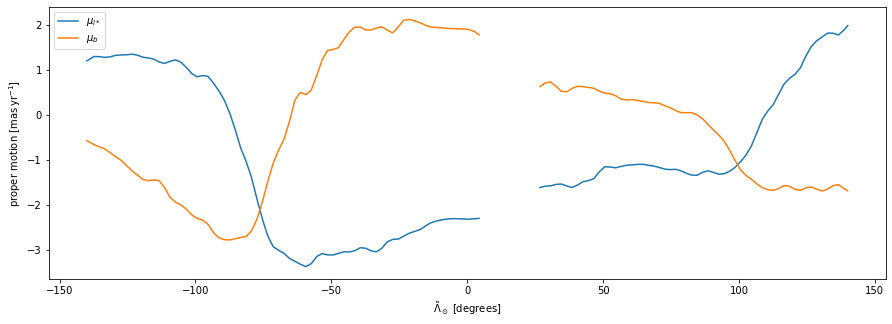

In [37]:
plt.figure(figsize=(15,5))
plt.plot(Lambda,result[:,0],label=r'$\mu_{l*}$');
plt.plot(Lambda,result[:,1],label=r'$\mu_{b}$');
plt.legend()
plt.xlabel(r'$\tilde{\Lambda}_\odot$ [degrees]');
plt.ylabel(r'proper motion [mas$\,$yr$^{-1}$]');

## Individual Interpolators

Each interpolator is a function that can be evaluated within the interpolation limits (check the manuscripts of the respective sources)

### Distance interpolator

In [38]:
import numpy as np

Lambda = np.linspace(-140,140,1000)

distance = sagittarius_properties.get_dist(Lambda,source='Strip')

In [25]:
import matplotlib.pylab as plt

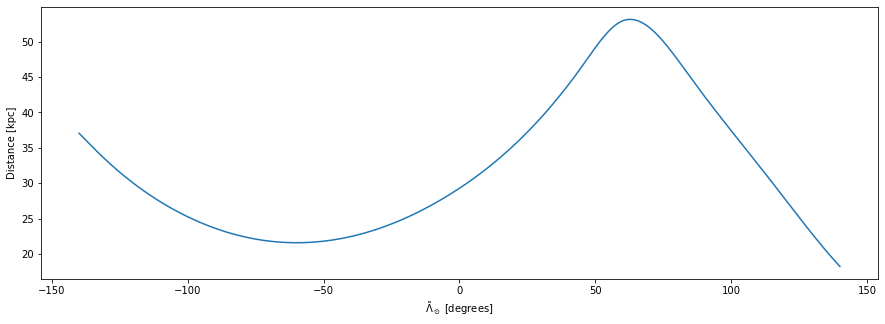

In [42]:
plt.figure(figsize=(15,5))
plt.plot(Lambda,distance);
plt.xlabel(r'$\tilde{\Lambda}_\odot$ [degrees]');
plt.ylabel(r'Distance [kpc]');

### Scale interpolator

In [48]:
import numpy as np

Lambda = np.linspace(-140,140,1000)

scale_strip = sagittarius_properties.get_scale(Lambda,source='Strip')
scale_ngc3 = sagittarius_properties.get_scale(Lambda,source='nGC3')

In [46]:
import matplotlib.pylab as plt

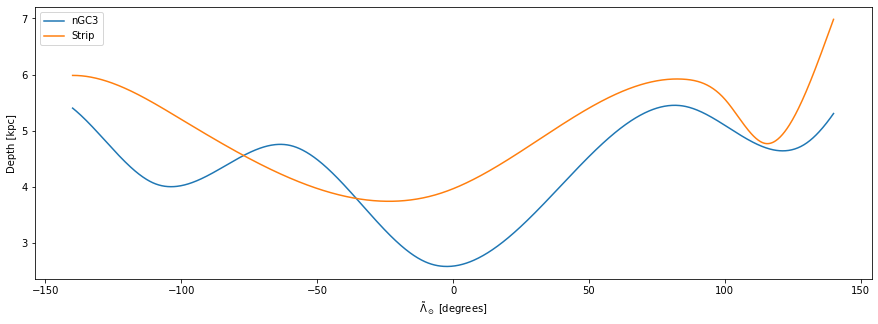

In [49]:
plt.figure(figsize=(15,5))
plt.plot(Lambda,scale_ngc3,label='nGC3');
plt.plot(Lambda,scale_strip,label='Strip');
plt.legend()
plt.xlabel(r'$\tilde{\Lambda}_\odot$ [degrees]');
plt.ylabel(r'Depth [kpc]');

### Proper motions interpolator

In [61]:
import numpy as np

Lambda = np.linspace(-140,140,1000)

pm_a20 = sagittarius_properties.get_pm(Lambda,source='a20',frame='gal').T
pm_strip = sagittarius_properties.get_pm(Lambda,source='Strip',frame='icrs').T

In [62]:
import matplotlib.pylab as plt

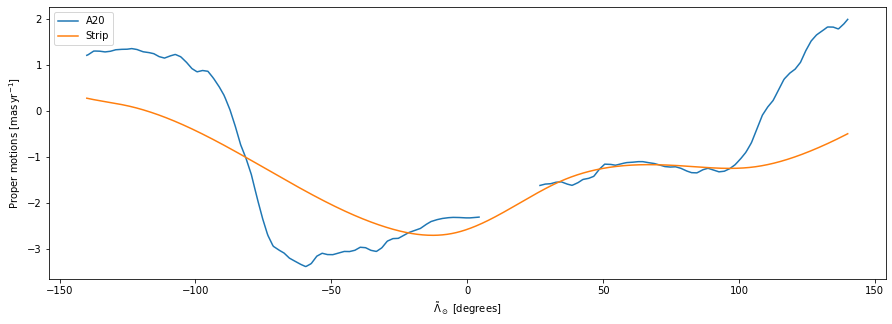

In [63]:
plt.figure(figsize=(15,5))
plt.plot(Lambda,pm_a20[:,0],label='A20');
plt.plot(Lambda,pm_strip[:,0],label='Strip');
plt.legend()
plt.xlabel(r'$\tilde{\Lambda}_\odot$ [degrees]');
plt.ylabel(r'Proper motions [mas$\,$yr$^{-1}$]');